<h1 align="center">Python Laibreries exam solution</h1>

## Data Preparation:

***import and copy data***

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [334]:
items_df = pd.read_csv(r"C:\Users\danir\Desktop\קורס AI\פתרונות שב ומטלות\מבחן ספריות פייתון\מבחן ספריות פייתון\Items.csv")
customers_df = pd.read_csv(r"C:\Users\danir\Desktop\קורס AI\פתרונות שב ומטלות\מבחן ספריות פייתון\מבחן ספריות פייתון\customers.csv")
orders_df = pd.read_csv(r"C:\Users\danir\Desktop\קורס AI\פתרונות שב ומטלות\מבחן ספריות פייתון\מבחן ספריות פייתון\orders.csv")
order_item_df = pd.read_csv(r"C:\Users\danir\Desktop\קורס AI\פתרונות שב ומטלות\מבחן ספריות פייתון\מבחן ספריות פייתון\order_item.csv")

In [335]:
items_df_copy = items_df.copy()
customers_df_copy = customers_df.copy()
orders_df_copy = orders_df.copy()
order_item_df_copy = order_item_df.copy()

***Ex 1 - Handle duplicate data in item dataset:***

In [336]:
## a(i) : search for duplicated name and brand
dup_rows = items_df_copy[items_df_copy.duplicated(['item_name', 'item_brand'], keep=False)]
print("Row duplicates:", len(dup_rows))

Row duplicates: 0


In [337]:
## a(ii) : search for dup name and missing brand
dup_name = items_df_copy.duplicated('item_name', keep=False)
brand_missing = items_df_copy['item_brand'].isna() | (items_df_copy['item_brand'].astype(str).str.strip() == '')
brand_missing = items_df_copy[dup_name & brand_missing]

names = brand_missing['item_name'].unique()
items_df_copy[items_df_copy['item_name'].isin(names)].sort_values(['item_name', 'item_brand'])

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
48,49,Headphone,Audio Equipment,1317.56,NaN,Sony,False
7,8,Headphone,NaN,3117.19,599.0,NaN,True


In [338]:
## b : remove duplicated data and change associations in other data sets
# I choosed to remove id 8
item_id_map = {8 : 49}
items_df_copy.set_index('id', inplace=True)
items_df_copy.drop(item_id_map.keys(), axis=0, inplace=True)
items_df_copy.reset_index('id', inplace=True)

order_item_df_copy['item_id'] = order_item_df_copy['item_id'].replace(item_id_map)

***Ex 2 - Handle duplicate data in customer dataset:***

In [339]:
## check for duplicates in customers_df_copy:
dup_email = customers_df_copy[customers_df_copy.duplicated('email', keep=False)]
print("RAW duplicates:", len(dup_email))
print("No email duplicates found in customers dataset")

RAW duplicates: 0
No email duplicates found in customers dataset


***Ex 3 - Handle missing data in all datasets:***

In [340]:
## items_df_copy missing data:
missing_data = items_df_copy.isnull().sum()
total_rows = items_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
final_missing_data

,Total rows,Missing rows,percentage missing
id,49,0,0.000000
item_name,49,0,0.000000
item_category,49,7,14.285714
item_price,49,0,0.000000
stock_quantity,49,5,10.204082
item_brand,49,2,4.081633
item_availability,49,0,0.000000


In [341]:
## Fill missing data with default values on items_df_copy:
items_df_copy['item_category'] = items_df_copy['item_category'].fillna('Other')
# fill with 'other' because itcan include various items and i want that those values to remain the same type of entire column.

items_df_copy['stock_quantity'] = items_df_copy['stock_quantity'].fillna(0)
# fill with 0 because if we don't know the quantity we can't invent quantites that don't exist. also in that way it remains the same type of value.

items_df_copy = items_df_copy.dropna(subset=['item_brand'])
# drop because percentage missing is less than 5%

order_item_df_copy = order_item_df_copy[order_item_df_copy['item_id'].isin(items_df_copy['id'])]
# adjust order_item_df_copy because the drop in items_df_copy

In [342]:
## customers_df_copy missing data:
missing_data = customers_df_copy.isnull().sum()
total_rows = customers_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
final_missing_data

,Total rows,Missing rows,percentage missing
id,500,0,0.0
first_name,500,0,0.0
last_name,500,0,0.0
gender,500,53,10.6
age,500,25,5.0
nationallity,500,0,0.0
joining_date,500,61,12.2
phone_number,500,0,0.0
email,500,0,0.0


In [343]:
## Fill missing data with default values on customers_df_copy:
customers_df_copy['gender'] = customers_df_copy['gender'].fillna('Unknown')
# fill with 'Unknown' because we don't know the gender and the type remains the same of entire column.

customers_df_copy['age'] = customers_df_copy['age'].fillna(round(customers_df_copy['age'].mean()))
# fill with mean age to avoid bias in statistics and remain the value as number like entire column.

customers_df_copy['joining_date'] = customers_df_copy['joining_date'].fillna('Unknown')
# fill with 'Unknown' because we have no information about the 'joining_date'. in calculations we will filter these values because the rntire values in column are dates.

In [344]:
## orders_df_copy missing data:
missing_data = orders_df_copy.isnull().sum()
total_rows = orders_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
final_missing_data

,Total rows,Missing rows,percentage missing
order_id,600,0,0.0
customer_id,600,45,7.5
delivery_address,600,0,0.0
delivery_days,600,75,12.5
order_date,600,0,0.0
payment_method,600,0,0.0
order_source,600,0,0.0


In [345]:
## Fill missing data with default values on orders_df_copy:
orders_df_copy['delivery_days'] = orders_df_copy['delivery_days'].fillna(0)
# fill with 0 because we haven't the information about the delivery time and also it will remain as a num value.
# to avoid bias in statistics we will filter this values in the column.

orders_df_copy = orders_df_copy.dropna(subset=['customer_id'])
# drop rows because nan in a mandatory column customer_id.

# adjust order_item_df_copy and items_df_copy because the drop above:
order_item_df_copy = order_item_df_copy[order_item_df_copy['order_id'].isin(orders_df_copy['order_id'])]
items_df_copy = items_df_copy[items_df_copy['id'].isin(order_item_df_copy['item_id'])]

In [346]:
## order_item_df_copy missing data:
order_item_df_copy = order_item_df_copy.drop(columns=['Unnamed: 0'])
missing_data = order_item_df_copy.isnull().sum()
total_rows =order_item_df_copy.isnull().count()
percentage_missing = missing_data * 100 / total_rows 
final_missing_data = pd.concat([total_rows, missing_data, percentage_missing], axis=1, keys=['Total rows', 'Missing rows', 'percentage missing'])
print(final_missing_data)
print("\nNo missing data on order_item_df_copy dataset")

          Total rows  Missing rows  percentage missing
id               866             0                 0.0
order_id         866             0                 0.0
item_id          866             0                 0.0
quantity         866             0                 0.0

No missing data on order_item_df_copy dataset


## Data analysis: 

***Ex 1 - explore customers_df_copy:***

In [347]:
## a - Count the number of customers by gender:
df_gender_count = customers_df_copy.groupby('gender').size()
df_gender_count = df_gender_count.reset_index(name='count')
df_gender_count

,gender,count
0,Agender,13
1,Bigender,5
2,Female,203
3,Genderfluid,12
4,Genderqueer,5
5,Male,196
6,Non-binary,7
7,Polygender,6
8,Unknown,53


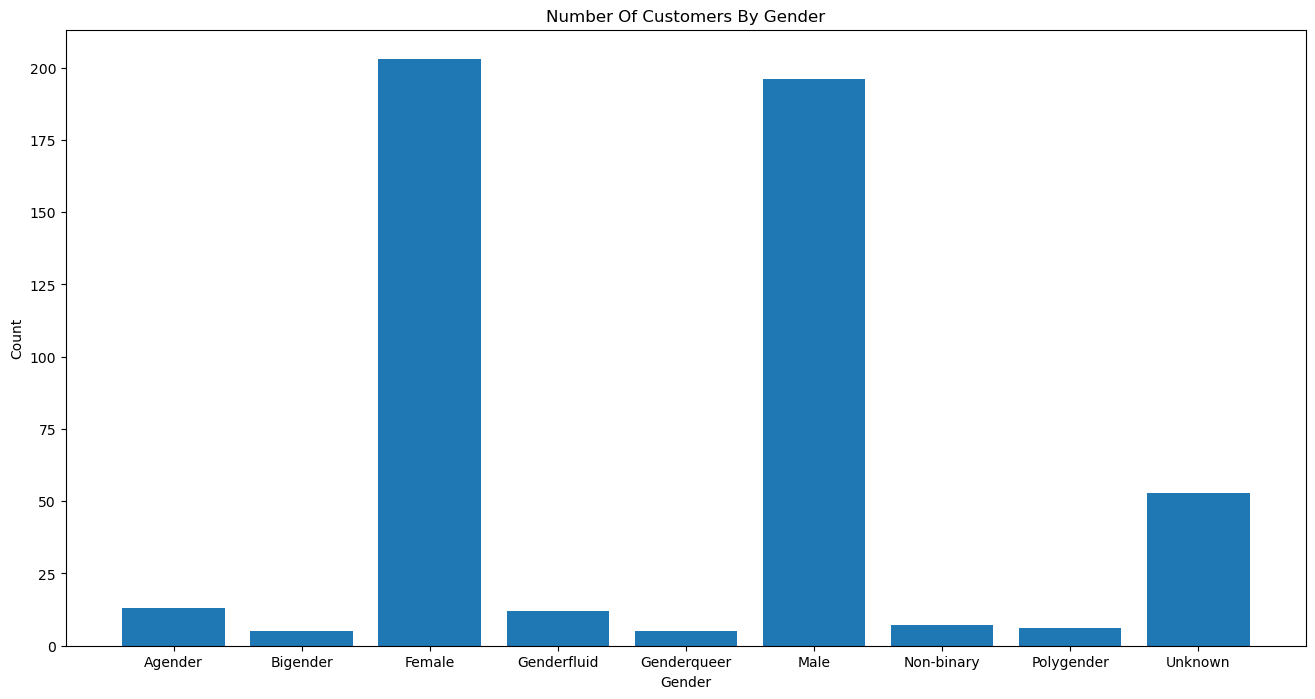

In [348]:
## plot Bar chart to visualize result:
plt.figure(figsize=(16,8))
plt.bar(df_gender_count['gender'], df_gender_count['count'])
plt.title('Number Of Customers By Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

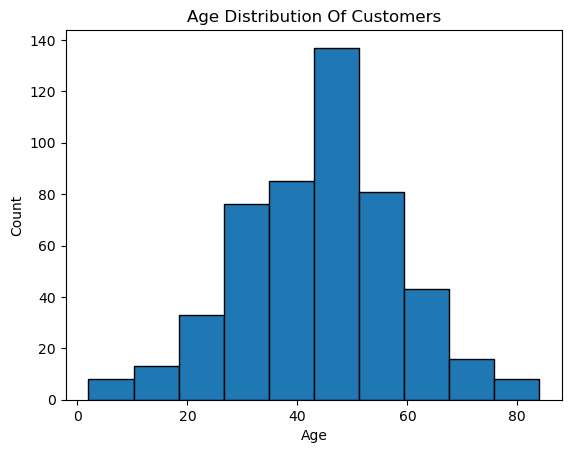

In [349]:
## b - Plot the customer age distribution with histogram chart:
plt.hist(customers_df_copy['age'], bins=10, edgecolor='black')
plt.title('Age Distribution Of Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [350]:
## c - Find what is the year with most joining customers to the company:
customers_df_copy['joining_date_dt'] = pd.to_datetime(customers_df_copy['joining_date'], errors='coerce')
year_counts = customers_df_copy['joining_date_dt'].dt.year.value_counts().sort_index()
year_counts_df = year_counts.reset_index(name='num_customers')
year_counts_df.columns = ['join_year', 'num_customers']
year_counts_df['join_year'] = year_counts_df['join_year'].astype(int)
year_counts_df['num_customers'] = year_counts_df['num_customers'].astype(int)
display(year_counts_df)
print(f"The year with the highest number of customers joined to the company is {year_counts_df.loc[2]['join_year']} with {year_counts_df.loc[2]['num_customers']} joined customers total")

,join_year,num_customers
0,2020,138
1,2021,138
2,2022,163


The year with the highest number of customers joined to the company is 2022 with 163 joined customers total


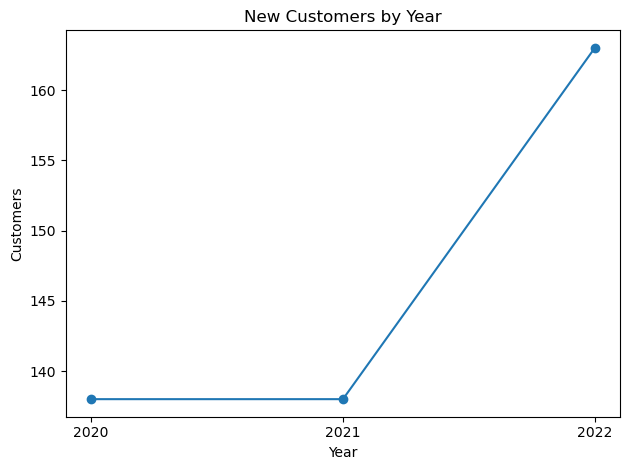

There isn’t a consistent year-over-year increase in customer sign-ups: 2020 and 2021 are identical, while 2022 shows a sharp rise, likely driven by a specific event (like a campaign or product launch) rather than a steady trend.


In [351]:
## d - Examine whether there's a prevailing trend:
plt.figure()
plt.plot(year_counts_df['join_year'], year_counts_df['num_customers'], marker='o')
plt.title('New Customers by Year')
plt.xlabel('Year')
plt.ylabel('Customers')
plt.xticks(year_counts_df['join_year'])
plt.tight_layout()
plt.show()
print("There isn’t a consistent year-over-year increase in customer sign-ups: 2020 and 2021 are identical, while 2022 shows a sharp rise, likely driven by a specific event (like a campaign or product launch) rather than a steady trend.")

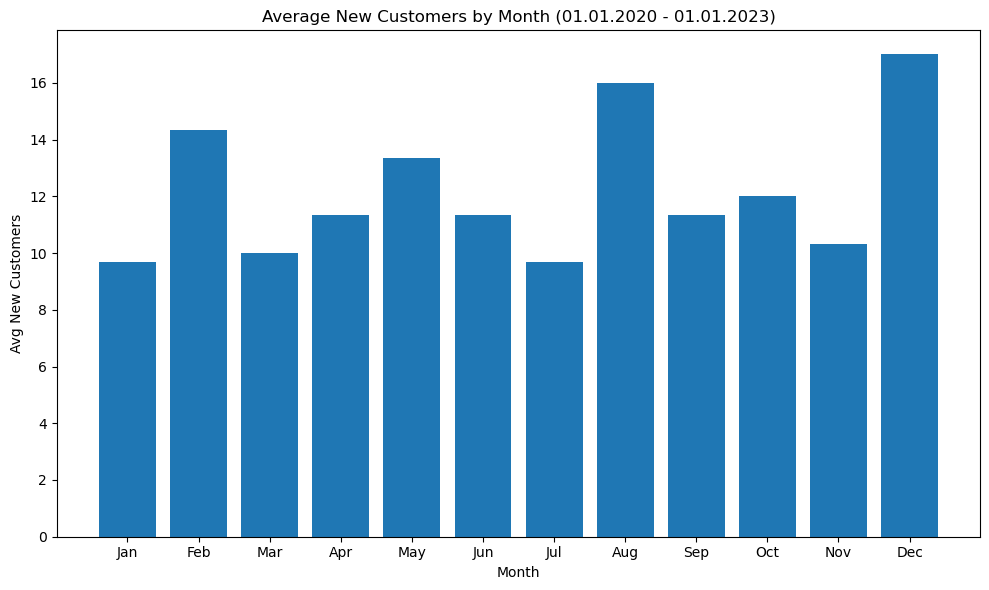

there’s seasonality: August and December are the strongest over years and sees a higher number of new customers.


In [352]:
## e - explore for particular month that consistently sees a higher number of new customers:
monthly = customers_df_copy.set_index('joining_date_dt').resample('MS').size()           
avg_by_month = monthly.groupby(monthly.index.month).mean()
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize= (10,6))
plt.bar(range(1, 13), avg_by_month.values)  
plt.xticks(range(1, 13), month_labels)
plt.xlabel('Month')
plt.ylabel('Avg New Customers')
plt.title('Average New Customers by Month (01.01.2020 - 01.01.2023)')
plt.tight_layout()
plt.show()
print("there’s seasonality: August and December are the strongest over years and sees a higher number of new customers.")

***Ex 2 - explore items_df_copy:***

In [353]:
## a - Count the number of items by category
items_by_category_count_df = items_df_copy.groupby('item_category').size().reset_index(name = 'item_count')
items_by_category_count_df

,item_category,item_count
0,Audio Equipment,3
1,Cables,1
2,Computers and Accessories,8
3,Gaming Equipment,2
4,Mobile Devices and Accessories,7
5,Network Equipment,1
6,Other,7
7,Photography Equipment,6
8,Printers and Office Equipment,6
9,Storage Devices,1


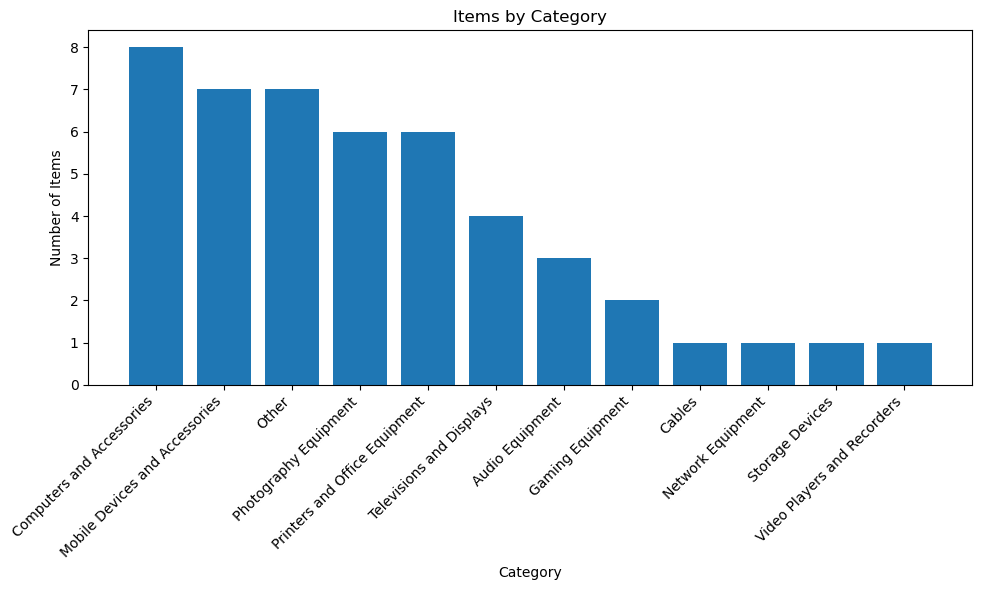

In [354]:
## plot bar chart(and not pie chart, as requested in the lesson with the given exam instructions):
plot_df = items_by_category_count_df.sort_values('item_count', ascending=False)
labels = list(plot_df['item_category'].astype(str))
sizes  = list(plot_df['item_count'])

plt.figure(figsize= (10,6))
plt.bar(labels, sizes)
plt.title('Items by Category')
plt.xlabel('Category')
plt.ylabel('Number of Items')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [355]:
## b - df of items with largest/lowest quantity in stock (default values exluded):
to_ignore = (items_df_copy['item_category'] != 'Unknown') & (items_df_copy['stock_quantity'] != 0)
filtered_df = items_df_copy.loc[to_ignore]
largest = filtered_df.nlargest(1, 'stock_quantity')
smallest = filtered_df.nsmallest(1, 'stock_quantity')
largest_smallest_df = pd.concat([largest, smallest], ignore_index=True)
largest_smallest_df

,id,item_name,item_category,item_price,stock_quantity,item_brand,item_availability
0,41,VR Headset,Other,1905.01,1367.0,JBL,True
1,35,Wi-Fi Router,Network Equipment,3812.53,14.0,Microsoft,True


In [356]:
## c - mean quantity in stock of all items (default values exluded):
mean_stock = filtered_df['stock_quantity'].mean()
print(f"Mean stock quantity of all items: {round(mean_stock)}")

Mean stock quantity of all items: 750


***Ex 3 - explore order_df_copy:***

In [357]:
## a - Amount of Customers by Number of Purchases:
orders_per_customer = orders_df_copy.groupby('customer_id').size()
distribution = orders_per_customer.value_counts().sort_index()
distribution.index.name = 'num_orders'
distribution_df = distribution.reset_index(name='num_customers')
distribution_df

,num_orders,num_customers
0,1,162
1,2,103
2,3,47
3,4,9
4,5,2


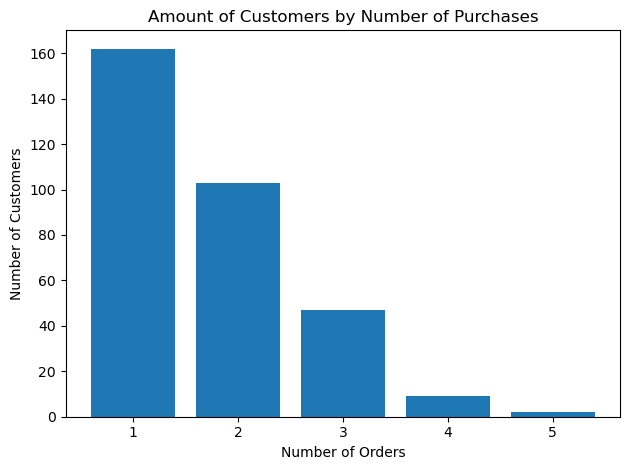

In [358]:
## plot bar chart
plt.figure()
plt.bar(distribution_df['num_orders'], distribution_df['num_customers'])
plt.title('Amount of Customers by Number of Purchases')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(distribution_df['num_orders']) 
plt.tight_layout()
plt.show()

In [359]:
## b - Find top 5 customers that ordered the most orders:
orders_per_customer = orders_df_copy.groupby('customer_id').size().reset_index(name='num_orders').sort_values('num_orders', ascending=False)
top5_cust = orders_per_customer.head(5)
name_df = customers_df_copy[['id', 'first_name', 'last_name']]
top5_df = top5_cust.merge(name_df, left_on='customer_id', right_on='id', how='inner')
top5_df = top5_df[['customer_id', 'first_name', 'last_name', 'num_orders']]
top5_df

,customer_id,first_name,last_name,num_orders
0,59.0,Merill,Lacroutz,5
1,138.0,Ellary,Ledner,5
2,63.0,Dorine,Cauldfield,4
3,204.0,Sharon,Wilby,4
4,286.0,Rolfe,Gravenell,4


In [360]:
## c - Calculate amount of customers by payment method: 
pay_method_count = orders_df_copy.groupby('payment_method')['customer_id'].nunique().sort_values(ascending=False)
payment_method_df = pay_method_count.reset_index(name='num_customers')
payment_method_df

,payment_method,num_customers
0,CHECK,126
1,CASH,125
2,GIFT_CARD,119
3,CREDIT_CARD,118


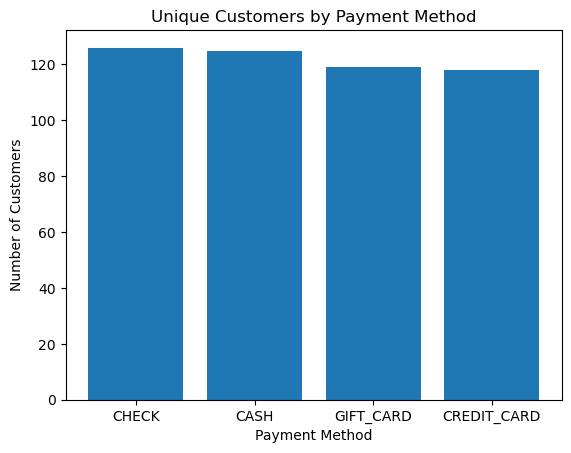

In [361]:
## plot bar chart(and not pie chart, as requested in the lesson with the given exam instructions):
plt.figure()
plt.bar(payment_method_df['payment_method'].astype(str),payment_method_df['num_customers'])
plt.title('Unique Customers by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

***Ex 4- explore all datasets:***

In [362]:
## a - show the total price of each order in orders dataset:
order_items_sum = order_item_df_copy.merge(items_df_copy[['id','item_price']], left_on='item_id', right_on='id', how='inner')
order_items_sum['total_sum'] = order_items_sum['quantity'] * order_items_sum['item_price']
order_total_price = order_items_sum.groupby('order_id')['total_sum'].sum().reset_index(name='total_price')

orders_df_with_total = orders_df_copy.merge(order_total_price, on='order_id', how='inner')
orders_df_with_total

,order_id,customer_id,delivery_address,delivery_days,order_date,payment_method,order_source,total_price
0,1,477.0,576 Cordelia Place,2.0,2023-12-05,GIFT_CARD,WEBSITE,8554.20
1,2,93.0,4664 6th Drive,4.0,2023-08-17,CASH,STORE,10148.58
2,3,474.0,8766 4th Point,4.0,2023-02-25,CHECK,STORE,6843.36
3,4,333.0,31 Bonner Way,3.0,2023-02-04,CASH,STORE,965.20
4,5,436.0,20352 Shelley Way,5.0,2023-06-01,CASH,STORE,63944.94
...,...,...,...,...,...,...,...,...
398,593,292.0,90001 Kedzie Point,0.0,2023-09-16,CREDIT_CARD,WEBSITE,2301.74
399,594,480.0,242 Brown Avenue,6.0,2023-02-18,GIFT_CARD,STORE,54186.82
400,596,110.0,26 Hudson Lane,5.0,2023-10-30,CREDIT_CARD,WEBSITE,5270.24
401,597,209.0,37392 Sullivan Park,4.0,2023-08-23,CREDIT_CARD,WEBSITE,1710.84


In [363]:
## b - show the max, min and mean of the orders total price(in df as requested in the lesson with the given exam instructions) :
min_total_price = orders_df_with_total['total_price'].min()
max_total_price = orders_df_with_total['total_price'].max()
mean_total_price = orders_df_with_total['total_price'].mean()

summary_df = pd.DataFrame({
    'metric': ['Min', 'Max', 'Mean'],
    'total_price': [min_total_price, max_total_price, mean_total_price]
})

summary_df['total_price'] = summary_df['total_price'].round(2)
summary_df

,metric,total_price
0,Min,241.54
1,Max,69581.82
2,Mean,14088.71


In [364]:
## c - check for correlation between the number of items in order and the delivery time:
items_per_order = order_item_df_copy.groupby('order_id')['quantity'].sum().reset_index(name='items_amount')
filtered_orders_df = orders_df_copy[(orders_df_copy['delivery_days'] != 0)]
days_per_amount_df = items_per_order.merge(filtered_orders_df[['order_id', 'delivery_days']], on='order_id', how='inner').sort_values('items_amount', ascending=False)
days_per_amount_df

,order_id,items_amount,delivery_days
205,335,28,3.0
18,24,27,3.0
4,5,25,5.0
51,73,23,3.0
115,187,23,5.0
...,...,...,...
61,93,1,4.0
44,62,1,4.0
303,510,1,2.0
307,514,1,3.0


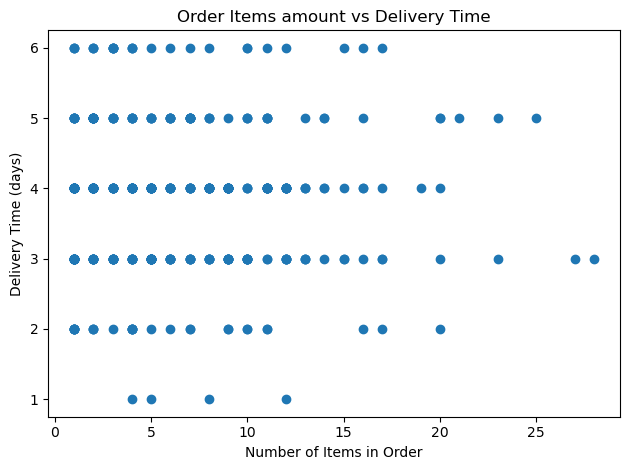


The days_per_amount_df and the scatter plot both indicate no correlation between the number of items in an order and its  delivery time


In [365]:
## analize by scatter plot:
plt.figure()
plt.scatter(days_per_amount_df['items_amount'], days_per_amount_df['delivery_days'])
plt.title("Order Items amount vs Delivery Time")
plt.xlabel('Number of Items in Order')
plt.ylabel('Delivery Time (days)')
plt.tight_layout()
plt.show()

print("\nThe days_per_amount_df and the scatter plot both indicate no correlation between the number of items in an order and its  delivery time")

In [366]:
## d - Find how many customers never created any order:
no_order_customers = customers_df_copy[~customers_df_copy['id'].isin(orders_df_copy['customer_id'])]
print("Customers with zero orders:", len(no_order_customers))

Customers with zero orders: 177


In [367]:
## e - Find what are the top 5 items that has been ordered the lowest:
quantity_by_item = order_item_df_copy.groupby('item_id')['quantity'].sum().rename('total_orderd').reset_index()
items_ordered_df = items_df_copy.merge(quantity_by_item, left_on='id', right_on='item_id', how='inner')

lowest5 = items_ordered_df.nsmallest(5,'total_orderd')[['id', 'item_name', 'item_category', 'item_brand', 'total_orderd']].reset_index(drop=True)
lowest5

,id,item_name,item_category,item_brand,total_orderd
0,29,Webcam,Printers and Office Equipment,Dell,24
1,33,Surge Protector,Printers and Office Equipment,ASUS,25
2,21,External Hard Drive,Computers and Accessories,Microsoft,29
3,6,Printer,Printers and Office Equipment,Sony,31
4,28,CCTV Camera,Other,Sony,32


## Bonus - Decision making:

***1 - did the August 2023 marketing campaign was usful or not?***

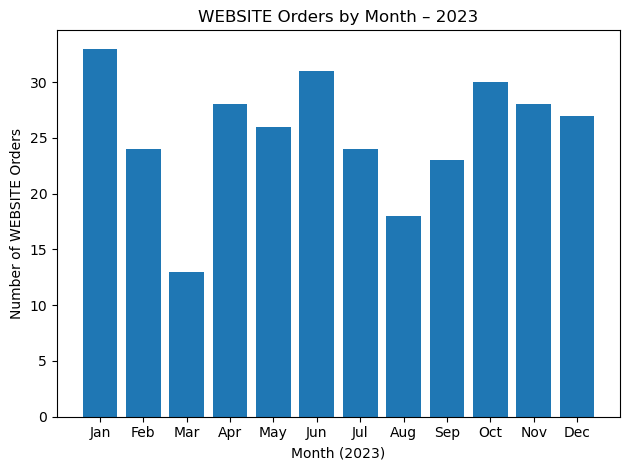


Website orders in August 2023 = 18


In [368]:
## calculate WEBSITE Orders by Month – 2023:
df = orders_df_copy.copy()
df['order_date'] = pd.to_datetime(df['order_date'])

web23 = df[(df['order_source'] == 'WEBSITE') & (df['order_date'].dt.year == 2023)].copy()
month_counts = web23.groupby(web23['order_date'].dt.month)['order_id'].nunique().reindex(range(1, 13))

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure()
plt.bar(range(1, 13), month_counts.values)
plt.xticks(range(1, 13), labels)
plt.xlabel('Month (2023)')
plt.ylabel('Number of WEBSITE Orders')
plt.title('WEBSITE Orders by Month – 2023')
plt.tight_layout()
plt.show()

aug_2023 = df[(df['order_source'] == 'WEBSITE') & (df['order_date'].dt.month == 8) & (df['order_date'].dt.year == 2023)]
num_aug_2023 = aug_2023['order_id'].nunique()

print("\nWebsite orders in August 2023 =", num_aug_2023)

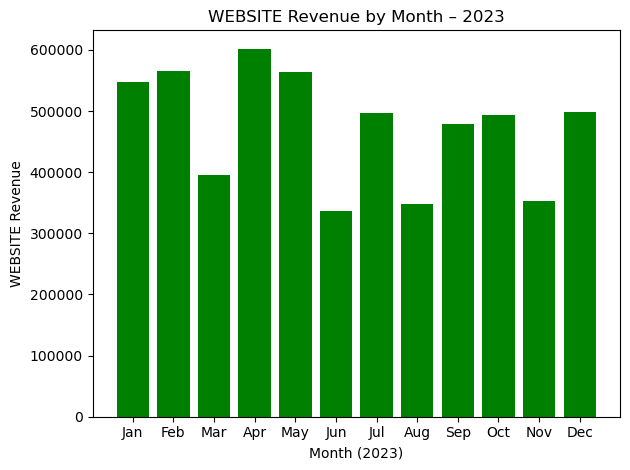

In [369]:
## calculate WEBSITE revenue by Month – 2023:
orders_df_with_total['order_date'] = pd.to_datetime(orders_df_with_total['order_date'])
monthly_revenue = orders_df_with_total.groupby(orders_df_with_total['order_date'].dt.month)['total_price'].sum().reindex(range(1, 13))
        
plt.figure()
plt.bar(range(1, 13), monthly_revenue.values, color='green')
plt.xticks(range(1, 13), labels)
plt.xlabel('Month (2023)')
plt.ylabel('WEBSITE Revenue')
plt.title('WEBSITE Revenue by Month – 2023')
plt.tight_layout()
plt.show()

**conclusion 1:**
Based on the calculations and visualizations presented above, we observe that in August there is a decline in the number of orders and revenue generated through the Website compared to July. However, moving forward, we see an increase in Website revenue during September and October 2023. Toward the end of the year, the number of Website orders declines again in November and December, while revenue drops in November but rises once more in December. Accordingly, we conclude that in August the campaign was less successful, as it did not manage to increase the level of orders and revenue during that month. However, considering that the campaign continued beyond August, we can see a significant rise in both orders and revenue in September and October. From this perspective, the marketing campaign that started in August 2023 can be considered successful in the following months.

***2 - did the discount prices for those who are using gift cards was increased the sales or not?***

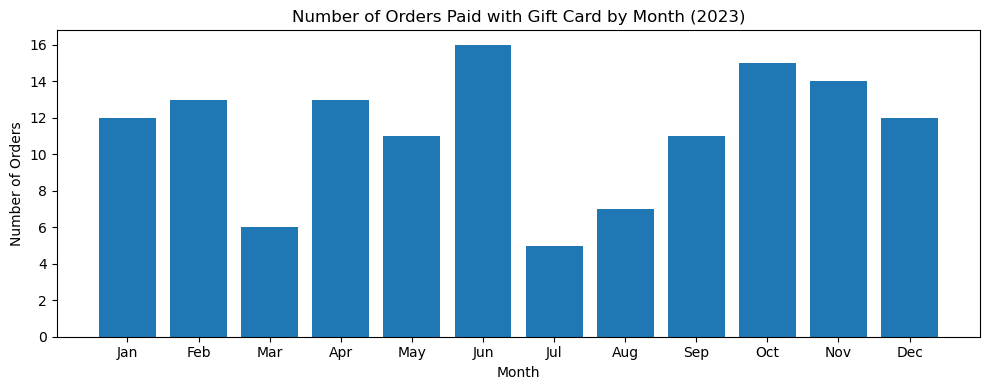

In [370]:
## compare amount of orders via gift-card across monthes in year 2023:
is_2023 = df['order_date'].dt.year == 2023
is_gift = df['payment_method'].eq('GIFT_CARD')
gift2023 = df[is_2023 & is_gift].copy()
gift2023['month'] = gift2023['order_date'].dt.month
counts = gift2023.groupby('month').size().reindex(range(1, 13),fill_value=0)

plt.figure(figsize=(10, 4))
plt.bar(counts.index, counts.values)
plt.title('Number of Orders Paid with Gift Card by Month (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(range(1, 13),labels)
plt.tight_layout()
plt.show()

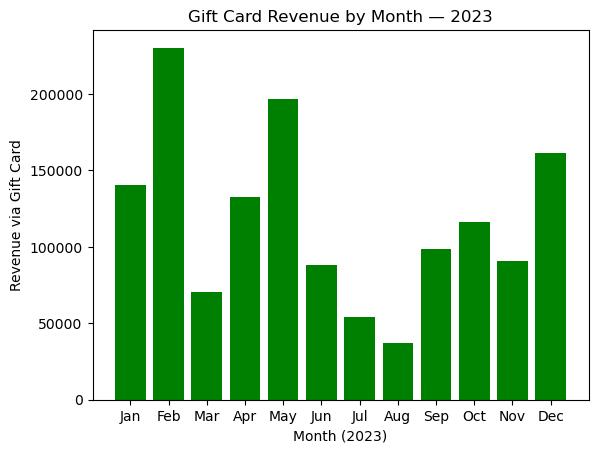

In [371]:
## compare revenue via gift-card across monthes in year 2023:
gc23 = orders_df_with_total[(orders_df_with_total['payment_method'] == 'GIFT_CARD') & (orders_df_with_total['order_date'].dt.year == 2023)]
monthly_rev = gc23['total_price'].groupby(gc23['order_date'].dt.month).sum().reindex(range(1, 13))

plt.figure()
plt.bar(range(1, 13), monthly_rev.values, color='green')
plt.xticks(range(1, 13), labels)
plt.xlabel('Month (2023)')
plt.ylabel('Revenue via Gift Card')
plt.title('Gift Card Revenue by Month — 2023')
plt.show()

**conclusion 2:** 
To answer the question of whether the discount on gift card orders increased sales, we created two bar charts. In the first chart, we examined the number of gift card orders throughout the months of 2023. We can see that since August there has been a significant upward trend in the volume of gift card orders. However, in the second chart, which looks at the revenue from gift card orders, we observe that in August there was actually a decline in revenue compared to the previous months. In the following months, however, the trend shifted upward. Accordingly, assuming that the discount campaign continued beyond August, we can conclude that the discount through gift cards contributed to raising sales levels successfully in the subsequent months, but not in August itself.

